<a href="https://colab.research.google.com/github/rajagopalmotivate/DeepLearningforSocietal/blob/main/01_MNIST_Predict_with_Dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *My Deep Learning Jump start Project No. 1*

# My 1st Deep Learning experiement. G
##Given an image (digit), predict what class this image belongs.
### X is 28x28 image , Y is a label (can be any digit between 0 to 9)

# My name:

##Here are my steps
###Step 1: Define the Problem and Collect data, Load the collected data, Visuvalize it
###Step 2: Prepare the data (vectorize, reshape, normalize, OHE)
###Step 3: Define the network architecture
###Step 4: Define the metrics, optimizers, loss function, and Complie the model
###Step 5: Train the network
###Step 6: Evaluate the network, Iterate to improve the model
###Step 7: Predict

In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
#from keras.utils import to_categorical
from matplotlib import pyplot
#from keras.utils import plot_model
from IPython.display import Image
import tensorflow as tf



# 1. Download the MNIST dataset, and load it into 4 variables
```
(trainX, trainY), (testX, testY) = mnist.load_data()

```
##Tip 1.  aKerasDataset. load_data(): This method returns 4 variables

##Tip 2.  type(myObject) : Use this to find the type of object
          (e.g. is it a interger, array)

##Tip 3.  myArrary.shape returns the size of the array.
            1 D array of 10 elements will be (10).              
            2 D array will be (8, 8).





In [2]:
#Step 1: Load the collected data, Visuvalize it

(trainX, trainY), (testX, testY) = mnist.load_data()


print('The type of object is ..')
print(type(trainX))

numberofTrainingsamples = trainX.shape[0]
print("number of Training samples = " + str(numberofTrainingsamples))

print( "Shape of trainX: "+ str(trainX.shape) + ".   Shape of trainY" + str( trainY.shape))
print( "Shape of testX: "+ str(testX.shape) )


print("number of Test samples = " + str(testX.shape[0]))



11490434/11490434 [==============================] - 1s 0us/step
The type of object is ..
<class 'numpy.ndarray'>
number of Training samples = 60000
Shape of trainX: (60000, 28, 28).   Shape of trainY(60000,)
Shape of testX: (10000, 28, 28)
number of Test samples = 10000


#2. Visuvalize one of the elements of the dataset

TrainY [76] is labels as = 2
TrainX [76] is a image and looks like this...


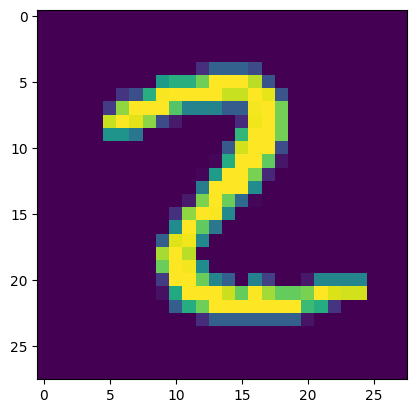

Shape of this image is (28, 28)


In [3]:
print("TrainY [76] is labels as = " + str(trainY[76]))
print("TrainX [76] is a image and looks like this...")
pyplot.imshow(trainX[76])
pyplot.show()
print( "Shape of this image is "+ str(trainX[76].shape) )



# 2.a Normalize values by dividing by 255

Check the values of the arrary before and after dividing it by 255. We divide to normalize the values between 0 and 1

## Tip 1: matplotlib.pyplot.imshow(myArray): Use this to plot an array as a image


TrainY [1000] is labels as = 0
TrainX [1000] is a image and looks like this...


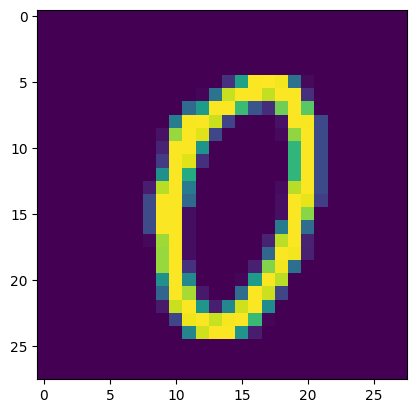

Shape of this image is (28, 28)
This is a 2 dimensional array and its value is
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  36 146 254 255
  251  95   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  97 234 254 254 232
  254 254  35   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  89 140 254 254 174  67  33
  200 254 190   0   0   0   

In [4]:
print("TrainY [1000] is labels as = " + str(trainY[1000]))
print("TrainX [1000] is a image and looks like this...")
pyplot.imshow(trainX[1000])
pyplot.show()
print( "Shape of this image is "+ str(trainX[1000].shape) )
print("This is a 2 dimensional array and its value is")
print(trainX[1000])



In [5]:
#Step 2: Prepare the data (vectorize, reshape, normalize, OHE)

print("trainY: "+ str(trainY[2]))
trainYready = tf.keras.utils.to_categorical(trainY)
print("trainYOHE: "+ str(trainYready[2]))
testYready = tf.keras.utils.to_categorical(testY)



trainY: 4
trainYOHE: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [6]:

trainXnormalized =  trainX.astype('float32') / 255

testXnormalized = testX.astype('float32')/ 255

trainXready [1000] is a image and looks like this...


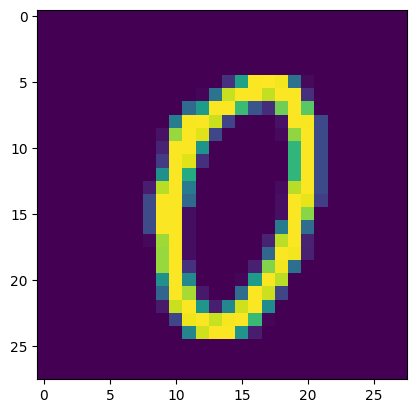

Shape of this image is (28, 28)
This is a 2 dimensional array and its value is
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.


In [7]:
print("trainXready [1000] is a image and looks like this...")
pyplot.imshow(trainXnormalized[1000])
pyplot.show()
print( "Shape of this image is "+ str(trainXnormalized[1000].shape) )
print("This is a 2 dimensional array and its value is")
print(trainXnormalized[1000])



In [8]:
print("Shape of trainXnormalized[0] is "+ str(trainXnormalized.shape[0]))


print( "\n Shape of trainXnormalized is "+ str(trainXnormalized.shape) )

trainXready = trainXnormalized.reshape( trainXnormalized.shape[0], 28*28 )

testXready = testXnormalized.reshape( testXnormalized.shape[0], 28*28 )

print( " Shape of trainXready is      "+ str(trainXready.shape) )





Shape of trainXnormalized[0] is 60000

 Shape of trainXnormalized is (60000, 28, 28)
 Shape of trainXready is      (60000, 784)


#3. Define the network architecture



In [9]:
#Step 3: Define the network architecture
network = models.Sequential(name='Karunya')
layer1 = layers.Dense(512, input_shape=(28*28,), activation='relu')
network.add(layer1)
layer2 = layers.Dense(128, activation='relu')
network.add(layer2)
layer3 = layers.Dense(10, activation='softmax')
network.add(layer3)


In [10]:
print(network.name)

print("Here is architecture of my neural network..  ")

print(network.summary())

Karunya
Here is architecture of my neural network..  
Model: "Karunya"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# Plot model graph

print('This is neural network model is a Fully Connected Neural network consisting of 3 Dense layers')
print('Input is a array of 784 elements ')
print('Output is one of 10 classes ')

print(network.name)

print(network)





This is neural network model is a Fully Connected Neural network consisting of 3 Dense layers
Input is a array of 784 elements 
Output is one of 10 classes 
Karunya


In [12]:
from google.colab import files
#files.download('my1stmodel.png')

FileNotFoundError: ignored

#4. Choose the loss funtion

In [13]:
#Step 4: Define the metrics, optimizers, loss function, and Complie the model
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
#5. Train the network

# 5. Train the network

##Tip 1 : myModel.fit( X, Y ) trains the neural network with dataset (X, Y ).
It returns a log history, which is a log of values in each iteration

In [15]:
#Step 5: Train the network
history = network.fit( trainXready, trainYready, batch_size=32, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.1927 - accuracy: 0.9417
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0836 - accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0626 - accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0487 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0371 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0293 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0241 - accuracy: 0.9931
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0197 - accuracy: 0.9946
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0151 - accuracy: 0.9958
Epoch 10/10
1875/1875 [==============================] - 16s 9ms/step - l

In [16]:
#Step 6: Evaluate the network
metrics_test_loss, metrics_test_accuracy = network.evaluate(testXready, testYready)

print(" Loss on test data is: " + str(metrics_test_loss))
print(" Accuracy of my nerual network on test data in percentage is : " + str(metrics_test_accuracy* 100))



313/313 [==============================] - 1s 3ms/step - loss: 0.1026 - accuracy: 0.9814
 Loss on test data is: 0.1025770902633667
 Accuracy of my nerual network on test data in percentage is : 98.14000129699707


# 6. Predict what class a image belongs to

### Tip 1. myModel.predict() accepts a array

1/1 [==============================] - 0s 93ms/step
Predicted Results: [[3.4291487e-21 1.8413552e-12 1.0000000e+00 1.6339706e-14 1.5103475e-27
  1.3237937e-24 7.3562090e-22 7.9584602e-27 3.9264805e-17 1.7942938e-27]]
Predicted Results: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Ground Truth OHE : [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Ground Truth :      [2]
Predicited class is : 2
My nerual network predicts the below image as : 2


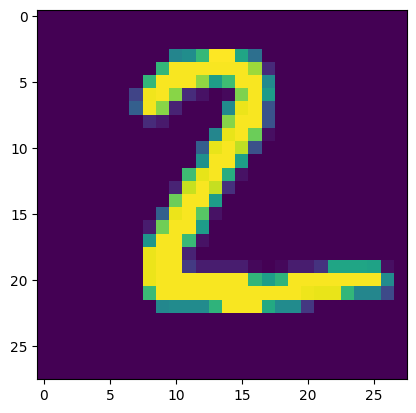

In [17]:
import numpy as np

#Step 7: Predict


predictedResults = network.predict(testXready[1:2])
print("Predicted Results: " + str(predictedResults))
predictedclass = predictedResults.argmax()


predictedResults = np.around(predictedResults)
print("Predicted Results: " + str(predictedResults))


print("Ground Truth OHE : " + str(testYready[1:2]))

print("Ground Truth :      " + str(testY[1:2]))

print("Predicited class is : " + str(predictedclass))

print("My nerual network predicts the below image as : " + str(predictedclass))


pyplot.imshow(testX[1])
pyplot.show()


1/1 [==============================] - 0s 23ms/step
Predicted Results: [[1.6105558e-12 4.6700508e-19 9.3771766e-20 7.6687928e-22 5.0150571e-17
  1.1307682e-13 1.0000000e+00 2.4497940e-22 6.5488636e-15 4.5434536e-22]]
Predicted Results: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Ground Truth OHE : [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Ground Truth :      [6]
Predicited class is : 6
My nerual network predicts the below image as : 6


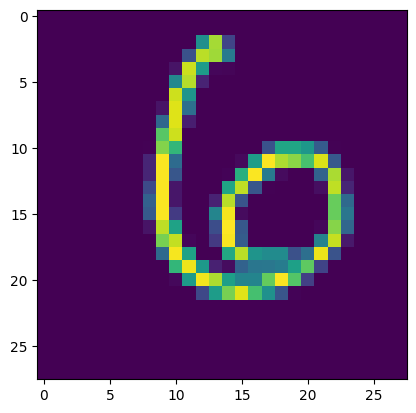

In [18]:

#Step 7: Predict

hereismyimageindextopredict = 100


predictedResults = network.predict(testXready[hereismyimageindextopredict:hereismyimageindextopredict+1])
print("Predicted Results: " + str(predictedResults))
predictedclass = predictedResults.argmax()


predictedResults = np.around(predictedResults)
print("Predicted Results: " + str(predictedResults))


print("Ground Truth OHE : " + str(testYready[hereismyimageindextopredict:hereismyimageindextopredict+1]))

print("Ground Truth :      " + str(testY[hereismyimageindextopredict:hereismyimageindextopredict+1]))

print("Predicited class is : " + str(predictedclass))

print("My nerual network predicts the below image as : " + str(predictedclass))


pyplot.imshow(testX[hereismyimageindextopredict])
pyplot.show()


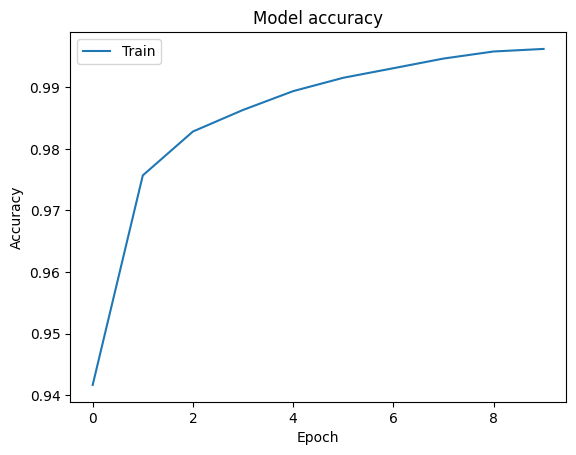

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

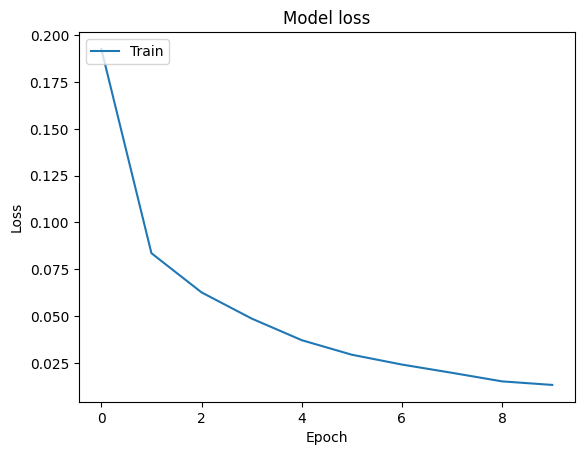

In [20]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()